In [2]:
import os
os.chdir("..")

In [11]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model_path = "models/tumor_detection_model.pt"
model = YOLO(model_path)

# Run inference on an image
img_path = "data/test/images/volume_1_slice_100_jpg.rf.b3e873b1f4d54ee6c59a12a7b5e3bdcb.jpg"
results = model(img_path)  # results list
boxes = results[0].boxes
class_names = model.names
class_boxes = {}
for box in boxes:
    cls_id = int(box.cls[0])
    cls_name = class_names[cls_id]
    xyxy = box.xyxy[0].tolist()
    class_boxes.setdefault(cls_name, []).append(xyxy)

class_boxes



image 1/1 d:\Mahsa-projects\brain-tumor-detection\data\test\images\volume_1_slice_100_jpg.rf.b3e873b1f4d54ee6c59a12a7b5e3bdcb.jpg: 256x256 1 label1, 50.0ms
Speed: 2.0ms preprocess, 50.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


{'label1': [[91.96156311035156,
   66.9979019165039,
   168.05270385742188,
   118.5528564453125]]}

In [10]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.8256])
data: tensor([[ 91.9616,  66.9979, 168.0527, 118.5529,   0.8256,   1.0000]])
id: None
is_track: False
orig_shape: (240, 240)
shape: torch.Size([1, 6])
xywh: tensor([[130.0071,  92.7754,  76.0911,  51.5550]])
xywhn: tensor([[0.5417, 0.3866, 0.3170, 0.2148]])
xyxy: tensor([[ 91.9616,  66.9979, 168.0527, 118.5529]])
xyxyn: tensor([[0.3832, 0.2792, 0.7002, 0.4940]])

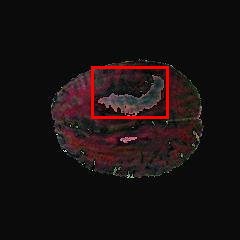

In [12]:
from PIL import Image, ImageDraw

x_min, y_min, x_max, y_max = class_boxes['label1'][0]
bbox = [x_min, y_min, x_max, y_max]
img = Image.open(img_path)

draw = ImageDraw.Draw(img)
draw.rectangle(bbox, outline='red', width=3)
img